# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [65]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | asaita
Processing Record 5 of Set 1 | manokwari
Processing Record 6 of Set 1 | kulia village
City not found. Skipping...
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | huotong
Processing Record 10 of Set 1 | angaur state
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | merizo village
Processing Record 14 of Set 1 | tazacorte
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | chita
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | panaba
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | ibia
Processing Record 21 of Set 1 | 

In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.91,79,90,4.52,PN,1715130879
1,waitangi,-43.9535,-176.5597,11.01,71,9,2.68,NZ,1715130880
2,port elizabeth,-33.9180,25.5701,19.50,88,0,10.80,ZA,1715130880
3,asaita,11.5636,41.4394,30.37,57,23,1.89,ET,1715130880
4,manokwari,-0.8667,134.0833,28.21,76,100,0.36,ID,1715130880


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.91,79,90,4.52,PN,1715130879
1,waitangi,-43.9535,-176.5597,11.01,71,9,2.68,NZ,1715130880
2,port elizabeth,-33.9180,25.5701,19.50,88,0,10.80,ZA,1715130880
3,asaita,11.5636,41.4394,30.37,57,23,1.89,ET,1715130880
4,manokwari,-0.8667,134.0833,28.21,76,100,0.36,ID,1715130880


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

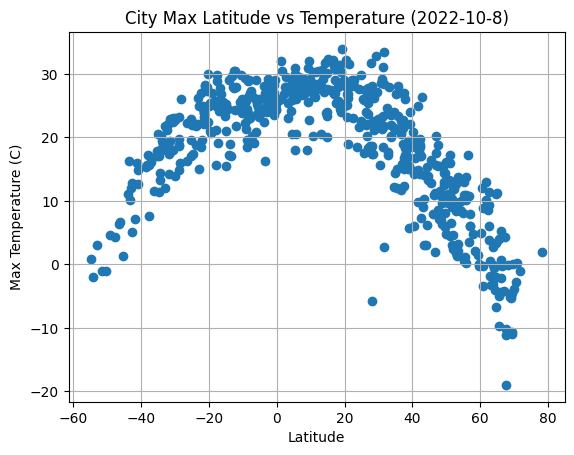

In [71]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature (2022-10-8)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

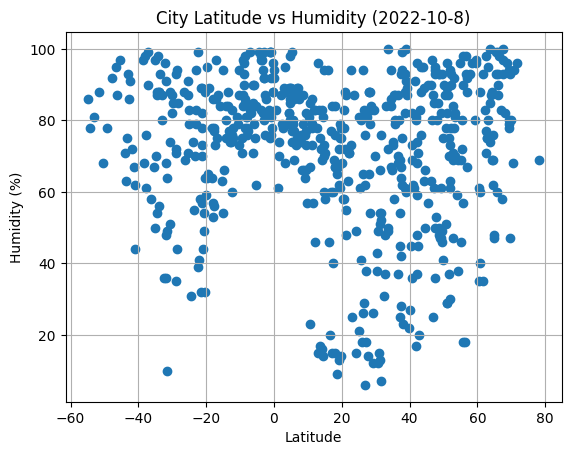

In [72]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2022-10-8)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

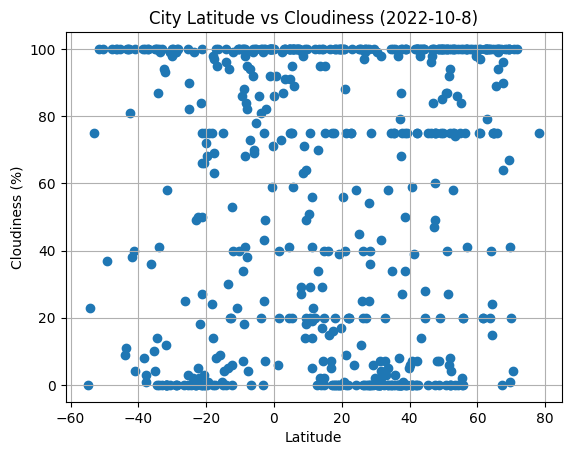

In [73]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2022-10-8)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

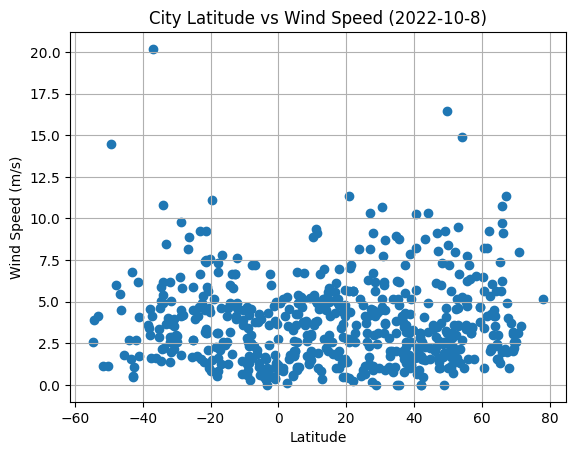

In [74]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2022-10-8)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def LinRegressWPlot(x_values, y_values, x_label, y_label, position):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # format and save line equation for presentation on plot      
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # present plot
    plt.scatter(x_values, y_values)  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, position, fontsize = 15, color = "red")

    print(f"The r-value is: {rvalue}")
    plt.show()


In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,asaita,11.5636,41.4394,30.37,57,23,1.89,ET,1715130880
7,huotong,26.8497,119.4181,23.75,76,100,1.25,CN,1715130881
8,angaur state,6.9060,134.1300,28.50,75,100,4.69,PW,1715130881
9,jamestown,42.0970,-79.2353,19.80,48,75,0.00,US,1715130881
10,merizo village,13.2658,144.6691,30.55,83,100,5.17,GU,1715130882


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.91,79,90,4.52,PN,1715130879
1,waitangi,-43.9535,-176.5597,11.01,71,9,2.68,NZ,1715130880
2,port elizabeth,-33.9180,25.5701,19.50,88,0,10.80,ZA,1715130880
4,manokwari,-0.8667,134.0833,28.21,76,100,0.36,ID,1715130880
5,edinburgh of the seven seas,-37.0676,-12.3116,16.16,90,100,20.18,SH,1715130881


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8658082462430888


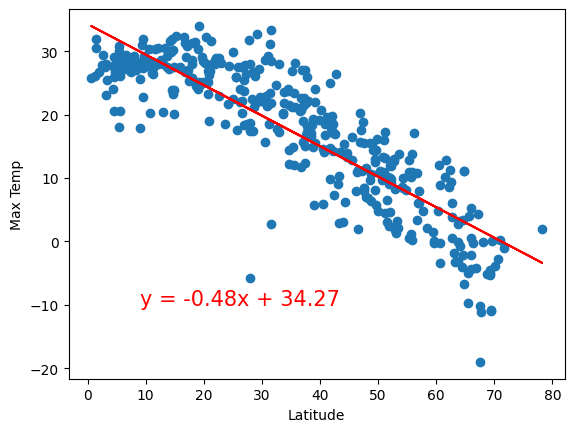

In [78]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"Latitude","Max Temp", (9,-10))


The r-value is: 0.7801640979140295


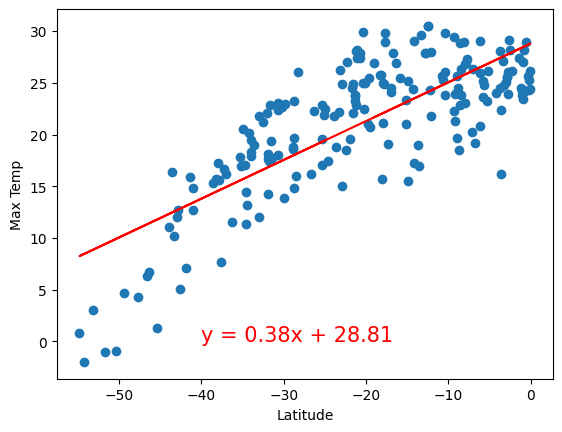

In [79]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"Latitude","Max Temp", (-40,0))

**Discussion about the linear relationship:** Max temperature in a city has a very strong correlation with how close to the equator the city is. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09231873921126751


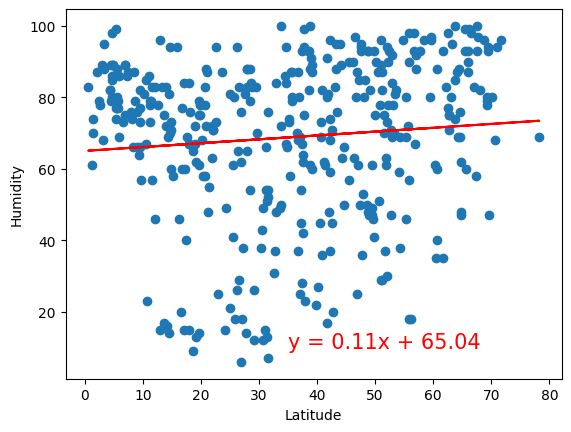

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"Latitude","Humidity", (35,10))

The r-value is: 0.2123737174233552


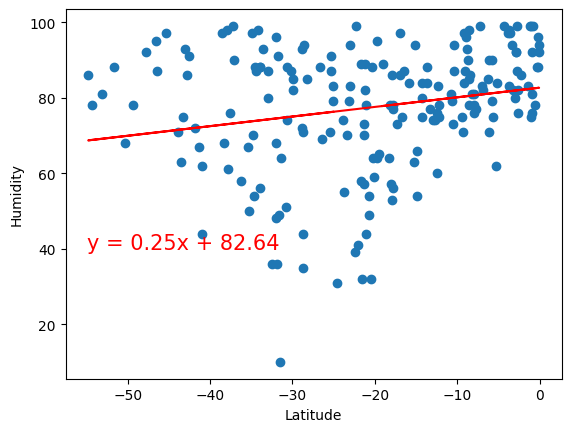

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"Latitude","Humidity", (-55,40))

**Discussion about the linear relationship:** There is a non-significant relation between humidity and distance form the equator. However the northern history while, still small is shows a ten-fold increase in r-value.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13209604964746205


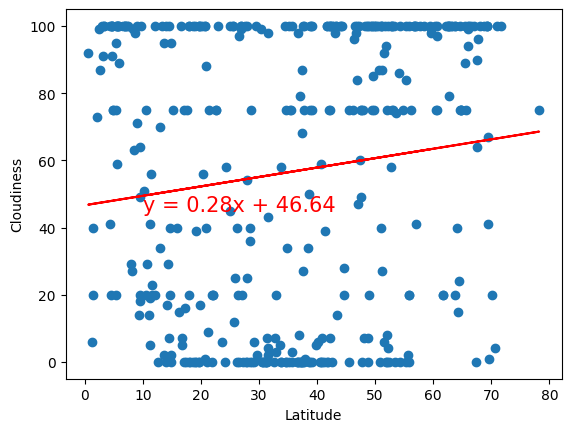

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"Latitude","Cloudiness", (10,45))

The r-value is: 0.13985939902553546


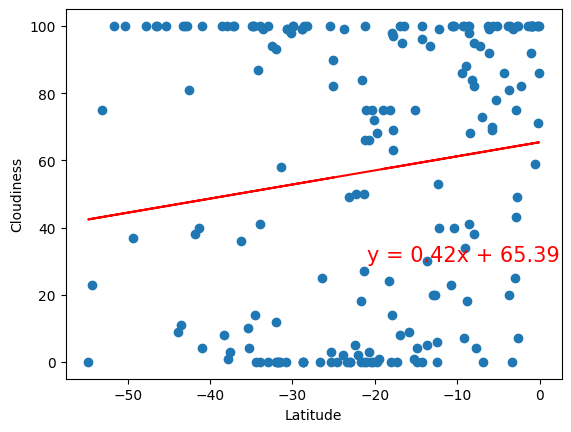

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"Latitude","Cloudiness", (-21,30))

**Discussion about the linear relationship:** Cloudiness has a weak correlation to proximity to equator in the southern hemisphere, but not in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08761014617988463


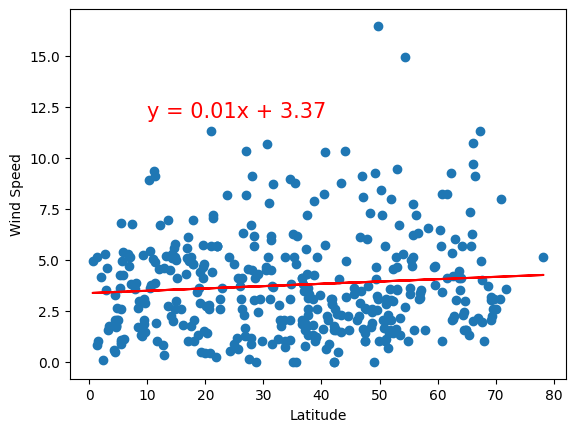

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"Latitude","Wind Speed", (10,12))

The r-value is: -0.22841759212576643


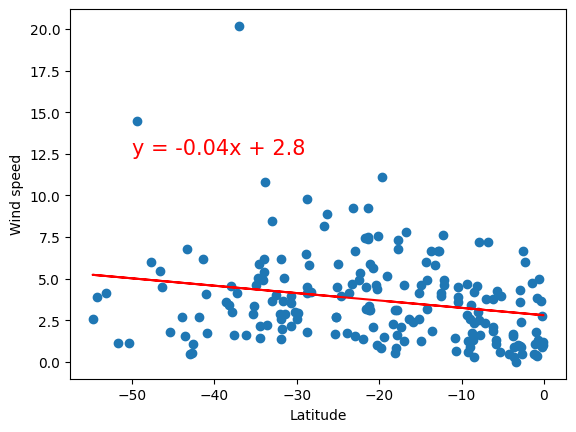

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Incorporate the other graph properties
LinRegressWPlot(x_values,y_values,"Latitude","Wind speed", (-50,12.5))

**Discussion about the linear relationship:** The r value for both hemispheres is less than .1. There is little to no significant correlation between wind speed and proximity to the equator.